# Solar Profile in Illinois

This notebook calculates an average hourly capacity factor for solar panels in Illinois.

We use a reference solar farm, UIUC Solar Farm 1.0, located in Champaign, IL. The data was provided by the University of Illinois Facilities and Services Department.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size'] = '16'
plt.style.use('ggplot')

colors = {'spring':'tab:green',
          'summer':'tab:red',
          'fall':'tab:orange',
          'winter':'tab:blue'}

In [2]:
solarfarm_df = pd.read_csv("../solarfarm_data.csv", parse_dates=True, index_col='time')
solarfarm_df

,Unnamed: 0,power_norm,power_data,kw
time,,,,
2016-01-01 00:00:00,0,0.0,0.0,0.0
2016-01-01 01:00:00,1,0.0,0.0,0.0
2016-01-01 02:00:00,2,0.0,0.0,0.0
2016-01-01 03:00:00,3,0.0,0.0,0.0
2016-01-01 04:00:00,4,0.0,0.0,0.0
...,...,...,...,...
2018-12-31 19:00:00,8755,0.0,0.0,0.0
2018-12-31 20:00:00,8756,0.0,0.0,0.0
2018-12-31 21:00:00,8757,0.0,0.0,0.0


In [3]:
hours_grouped = solarfarm_df.groupby(solarfarm_df.index.hour)

In [4]:
avg_hourly = np.zeros(len(hours_grouped))
std_hourly = np.zeros(len(hours_grouped))
for i, hour in enumerate(hours_grouped.groups):
    hour_data = hours_grouped.get_group(hour)
    avg_hourly[i] = hour_data.kw.mean()
    std_hourly[i] = hour_data.kw.std()

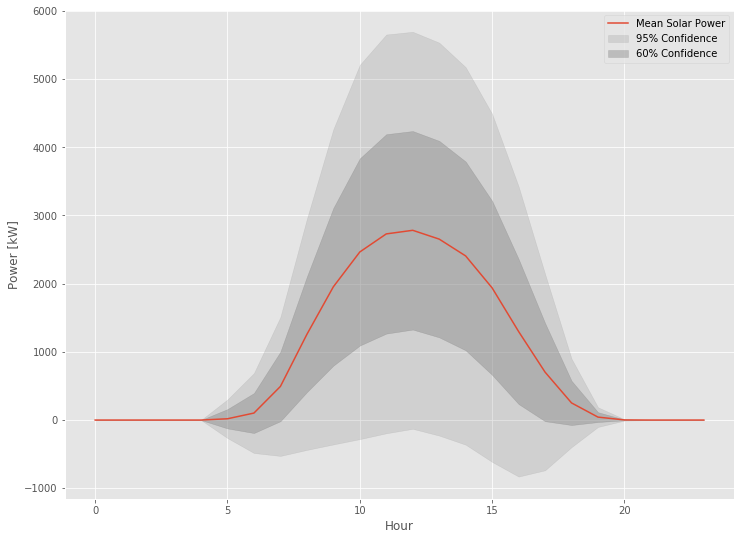

In [5]:
plt.plot(range(24), avg_hourly, label='Mean Solar Power')
plt.fill_between(range(24),
                 avg_hourly + 2 * std_hourly,
                 avg_hourly - 2 * std_hourly,
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(range(24),
                 avg_hourly + std_hourly,
                 avg_hourly - std_hourly,
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Power [kW]')
# plt.savefig("../report/img/cap/solar_mean.png")
plt.show()

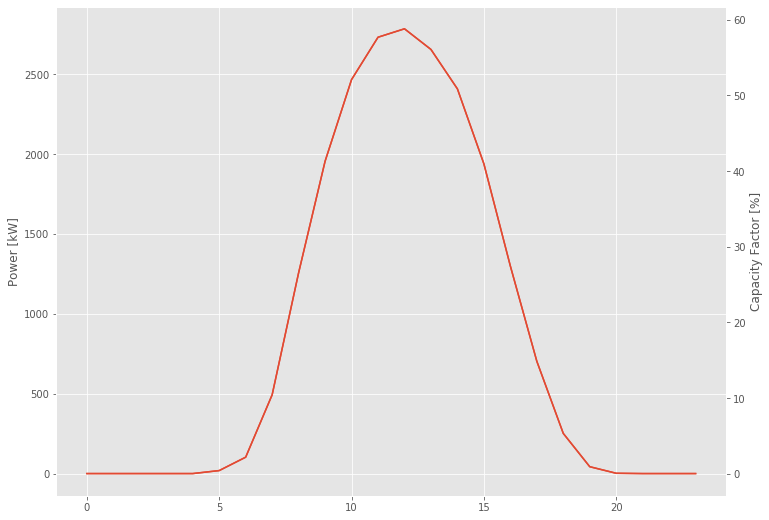

In [6]:
fig, ax = plt.subplots()
fig.figsize=(12,9)
ax.plot(range(24), avg_hourly, label='Mean Solar Power')
ax2 = ax.twinx()
ax2.plot(range(24), avg_hourly/solarfarm_df.kw.max()*100)
plt.xlabel('Hour')
ax.set_ylabel('Power [kW]')
ax2.set_ylabel('Capacity Factor [%]')
plt.grid(which='major')
plt.show()

In [7]:
avg_hourly.mean()/solarfarm_df.kw.max()

0.1857186869482588

In [8]:
for i, v in enumerate(avg_hourly):
    print(f"Hour {i+1} : {v/solarfarm_df.kw.max()} CF")

Hour 1 : 0.0 CF
Hour 2 : 0.0 CF
Hour 3 : 0.0 CF
Hour 4 : 0.0 CF
Hour 5 : 0.0 CF
Hour 6 : 0.003949309215393088 CF
Hour 7 : 0.021653656436258873 CF
Hour 8 : 0.10411803704731513 CF
Hour 9 : 0.2653757277183415 CF
Hour 10 : 0.41281977635749434 CF
Hour 11 : 0.5207802869652568 CF
Hour 12 : 0.5767748364622984 CF
Hour 13 : 0.5879209917082173 CF
Hour 14 : 0.5606197476224247 CF
Hour 15 : 0.5084890082366348 CF
Hour 16 : 0.40941826860758135 CF
Hour 17 : 0.27435428018825925 CF
Hour 18 : 0.14846214713362432 CF
Hour 19 : 0.05306370000022829 CF
Hour 20 : 0.00906989451280749 CF
Hour 21 : 0.00037881854607546155 CF
Hour 22 : 0.0 CF
Hour 23 : 0.0 CF
Hour 24 : 0.0 CF


In [9]:
spring_mask = (solarfarm_df.index.month >= 3) & (solarfarm_df.index.month <= 5) 
summer_mask = (solarfarm_df.index.month >= 6) & (solarfarm_df.index.month <= 8)
fall_mask = (solarfarm_df.index.month >= 9) & (solarfarm_df.index.month <= 11) 
winter_mask = (solarfarm_df.index.month == 12) | (solarfarm_df.index.month == 1) | (solarfarm_df.index.month == 2) 
seasons = {'spring':spring_mask,
           'summer':summer_mask,
           'fall':fall_mask,
           'winter':winter_mask}
seasonal_hourly_profile = {}

In [10]:
for season in seasons:
    mask = seasons[season]
    df = solarfarm_df[mask]
    hours_grouped = df.groupby(df.index.hour)
    
    avg_hourly = np.zeros(len(hours_grouped))
    std_hourly = np.zeros(len(hours_grouped))
    for i, hour in enumerate(hours_grouped.groups):
        hour_data = hours_grouped.get_group(hour)
        avg_hourly[i] = hour_data.kw.mean()
        std_hourly[i] = hour_data.kw.std()
        
    seasonal_hourly_profile[season] = avg_hourly
    colname = season+"_cf"
    seasonal_hourly_profile[colname] = avg_hourly/solarfarm_df.kw.max()

In [11]:
seasonal_df = pd.DataFrame(seasonal_hourly_profile)
seasonal_df

,spring,spring_cf,summer,summer_cf,fall,fall_cf,winter,winter_cf
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,9.380625,0.001982,64.849819,0.013701,0.000000,0.000000,0.000000,0.000000
6,131.632200,0.027810,261.247546,0.055194,10.322917,0.002181,3.979525,0.000841
7,649.876105,0.137300,773.988299,0.163522,353.496214,0.074684,186.848930,0.039476
8,1466.295359,0.309786,1578.118372,0.333411,1135.125502,0.239819,835.892322,0.176600
9,2217.817092,0.468561,2287.473624,0.483278,1917.364899,0.405084,1382.510535,0.292085


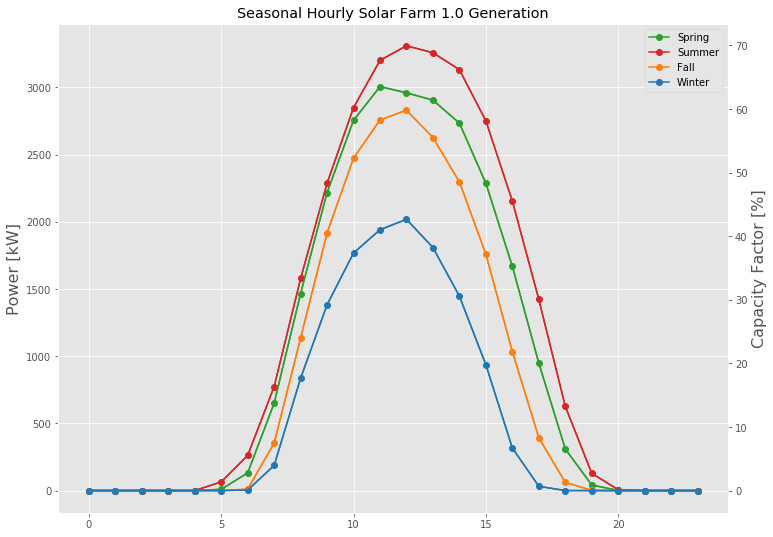

In [14]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.figsize=(12,9)
for season in seasons:
    cf_key = season+"_cf"
    ax.plot(range(24), seasonal_df[season], label=season.capitalize(), color=colors[season], marker='o')
    ax2.plot(range(24), seasonal_df[cf_key]*100, color=colors[season])
plt.xlabel('Hour',fontsize=16)
plt.title("Seasonal Hourly Solar Farm 1.0 Generation")
ax.legend()
ax.set_ylabel('Power [kW]',fontsize=16)
ax2.set_ylabel('Capacity Factor [%]',fontsize=16)
plt.grid(which='major')
plt.show()
# fig.savefig("../report/img/cap/seasonal_hourly_solar.png")

In [13]:
total = 0.0
for season in seasons:
    data = seasonal_df[season+"_cf"]
    for i,value in enumerate(data):
        total += value
        print(f"INSERT INTO `CapacityFactorTech` VALUES ('UIUC','{season}','H{i+1}','SOLAR_FARM',{value},'');")

INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H1','SOLAR_FARM',0.0,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H2','SOLAR_FARM',0.0,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H3','SOLAR_FARM',0.0,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H4','SOLAR_FARM',0.0,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H5','SOLAR_FARM',0.0,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H6','SOLAR_FARM',0.0019818570257042613,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H7','SOLAR_FARM',0.027810109301121995,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H8','SOLAR_FARM',0.13730018590303464,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H9','SOLAR_FARM',0.30978616356262445,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H10','SOLAR_FARM',0.4685611560628991,'');
INSERT INTO `CapacityFactorTech` VALUES ('UIUC','spring','H11','SOLAR_FARM',0